## Hierarchical Clustering

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.metrics import silhouette_score

### Load Dataset

In [2]:
df=pd.read_csv("crime_data.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
df_citynames=df['Unnamed: 0']

### Droping the categorical feature

In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


### Scaling the numeric features

In [5]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)
df_scaled=pd.DataFrame(df_scaled,columns=df.columns)

In [6]:
np.round(df_scaled.describe(),2)

,Murder,Assault,UrbanPop,Rape
count,50.00,50.00,50.00,50.00
mean,-0.00,0.00,-0.00,0.00
std,1.01,1.01,1.01,1.01
min,-1.62,-1.52,-2.34,-1.50
25%,-0.86,-0.75,-0.77,-0.66
50%,-0.12,-0.14,0.03,-0.12
75%,0.80,0.95,0.85,0.53
max,2.23,2.02,1.78,2.67


### Plotting the Dendrogram 

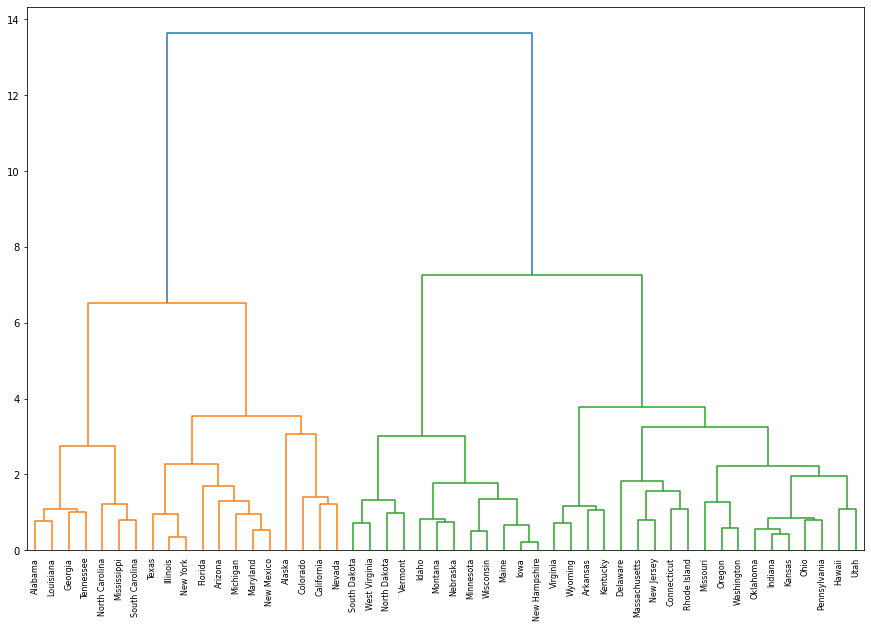

In [7]:
link_avg=linkage(df_scaled,method='ward')
plt.figure(figsize=(15,10))
dend=dendrogram(link_avg,labels=df_citynames.values)
dend;

In [8]:
dend["color_list"]

unique_colors=set(dend["color_list"])
unique_colors

len(unique_colors)-1

2

### Silhouette Score

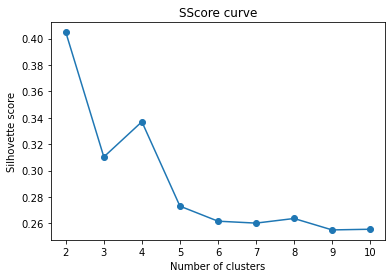

In [9]:
ss=[]
for i in range(2,11):
    ag=AgglomerativeClustering(n_clusters=i,linkage='ward')
    ag.fit(df_scaled)
    ss.append(silhouette_score(df_scaled,ag.labels_))

plt.plot(range(2,11),ss,marker='o')
plt.title("SScore curve")
plt.xlabel("Number of clusters")
plt.ylabel("Silhovette score");

### Since the highest vertical distance btw the horizontal lines  without any merges in dendogram is 2 and also the silhouette score is maximum for 2 clusters will choose no of clusters as 2 and perform hierarchical clustering

### Building  Hierarchical Clustering Model 

In [10]:
agglo=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
agglo.fit(df_scaled)
cluster_labels=agglo.labels_

In [11]:
df['cluster_labels_agglo']=cluster_labels
df.head()

,Murder,Assault,UrbanPop,Rape,cluster_labels_agglo
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,1


In [12]:
df.groupby("cluster_labels_agglo").mean()

,Murder,Assault,UrbanPop,Rape
cluster_labels_agglo,,,,
0,5.003226,116.483871,63.838710,16.338710
1,12.331579,259.315789,68.315789,29.215789


### From the above profile we can say that the cities belonging to cluster 1 is more safer to people as the murder,assault and rape rates are lesser in these cities.

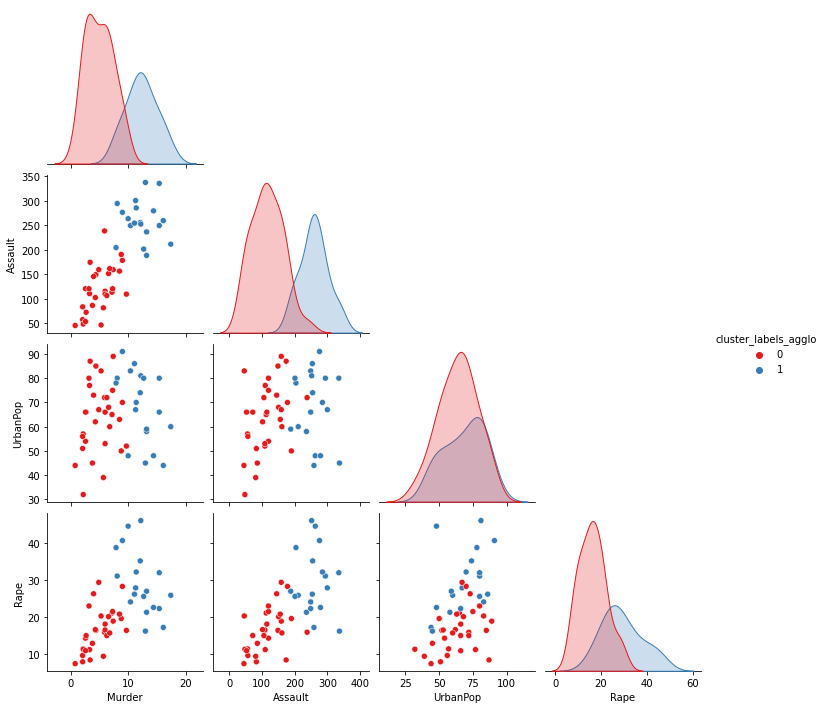

In [13]:
sns.pairplot(df,hue='cluster_labels_agglo',palette="Set1",corner=True);

## KMeans Clustering

### WSS

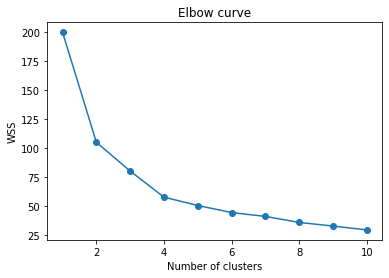

In [14]:
wss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(df_scaled)
    wss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wss,marker='o')
plt.title("Elbow curve")
plt.xlabel("Number of clusters")
plt.ylabel("WSS");

### Silhouette Score

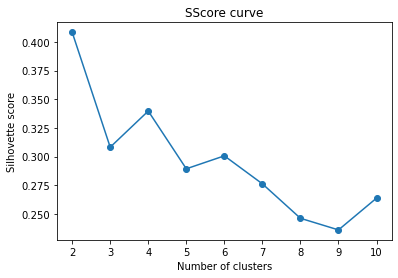

In [15]:
ss_kmeans=[]
for i in range(2,11):
    km=KMeans(n_clusters=i,random_state=42)
    km.fit(df_scaled)
    ss_kmeans.append(silhouette_score(df_scaled,km.labels_))

plt.plot(range(2,11),ss_kmeans,marker='o')
plt.title("SScore curve")
plt.xlabel("Number of clusters")
plt.ylabel("Silhovette score");

### The Silhouette score is maximum for 2 clusters  and elbow is occuring at 2 will choose no of clusters as 2 and perform KMeans clustering

### Building  KMeans Clustering Model 

In [16]:
km=KMeans(n_clusters=2,random_state=42)
km.fit(df_scaled)
df["cluster_labels_kmeans"]=km.labels_

In [17]:
df.head()

,Murder,Assault,UrbanPop,Rape,cluster_labels_agglo,cluster_labels_kmeans
0,13.2,236,58,21.2,1,1
1,10.0,263,48,44.5,1,1
2,8.1,294,80,31.0,1,1
3,8.8,190,50,19.5,0,0
4,9.0,276,91,40.6,1,1


In [18]:
df.groupby('cluster_labels_kmeans').mean()

,Murder,Assault,UrbanPop,Rape,cluster_labels_agglo
cluster_labels_kmeans,,,,,
0,4.870,114.433333,63.633333,15.943333,0.00
1,12.165,255.250000,68.400000,29.165000,0.95


### From the above profile we can say that the cities belonging to cluster 0 is more safer to people as the murder,assault and rape rates are lesser in these cities.

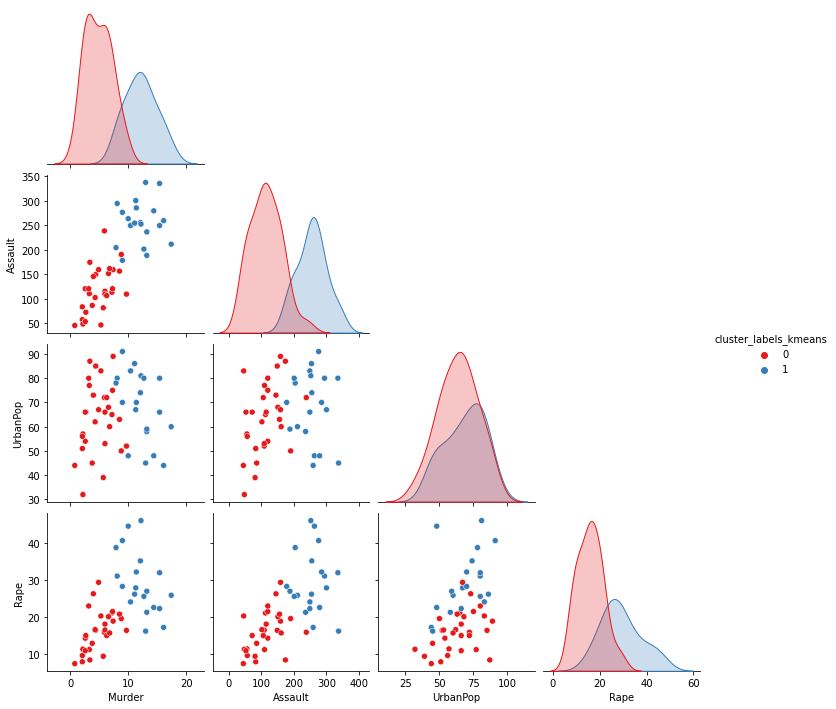

In [19]:
sns.pairplot(df,hue="cluster_labels_kmeans",palette="Set1",corner=True,vars=["Murder","Assault","UrbanPop","Rape"]);

## DBSCAN Clustering

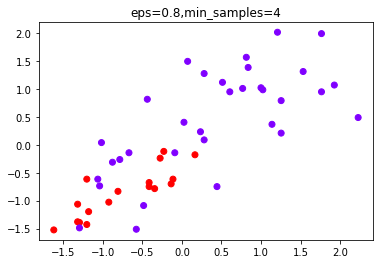

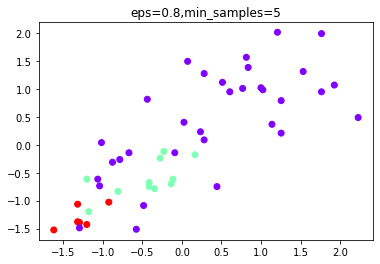

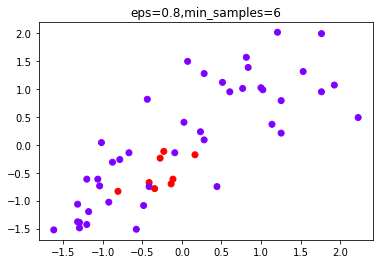

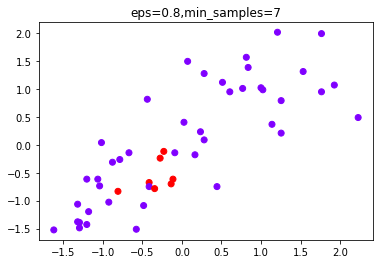

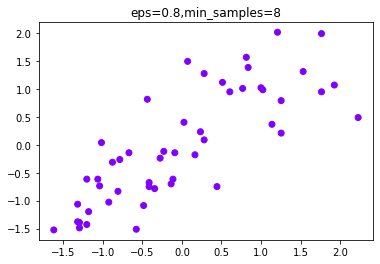

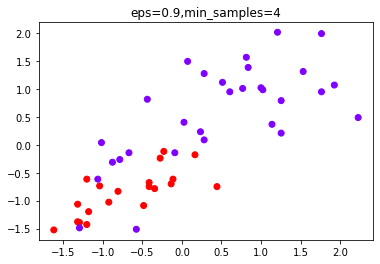

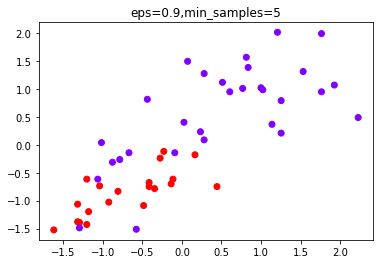

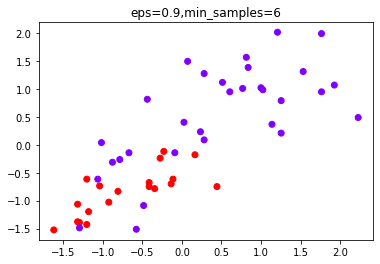

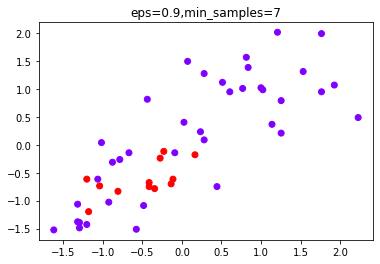

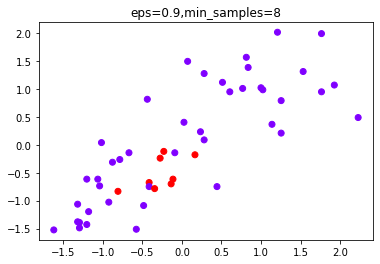

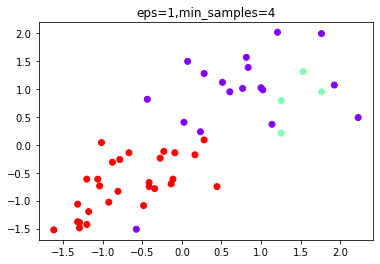

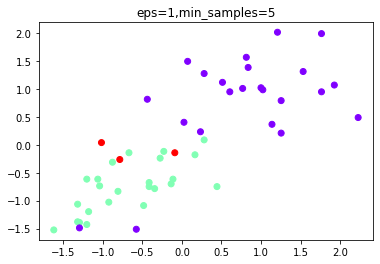

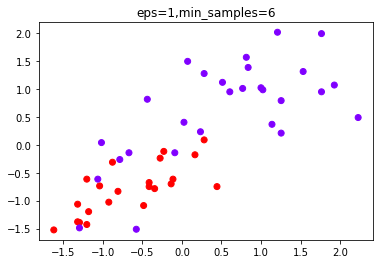

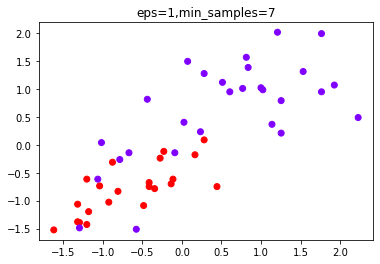

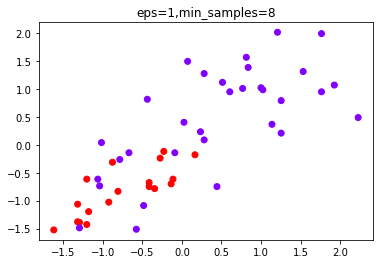

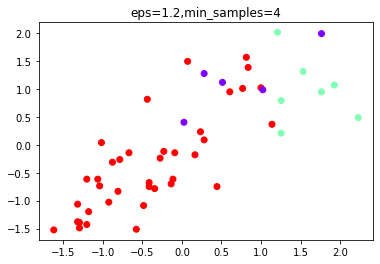

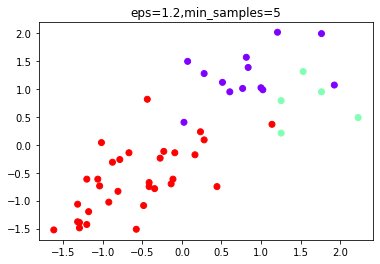

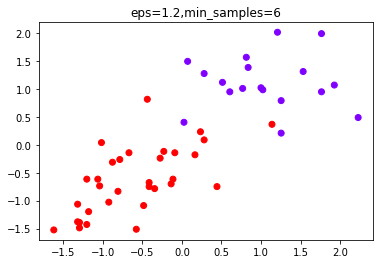

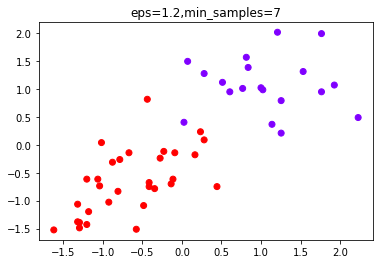

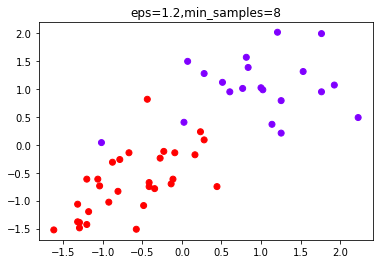

In [20]:
epsilon=[0.8,0.9,1,1.2]
samples=[4,5,6,7,8]
for e in epsilon :
    for s in samples:
        dbscan=DBSCAN(eps=e,min_samples=s)
        labels_dbscan=dbscan.fit_predict(df_scaled)
        plt.scatter(df_scaled["Murder"],df_scaled["Assault"],c=labels_dbscan,cmap="rainbow")
        plt.title("eps={},min_samples={}".format(e,s))
        plt.show()

### since foe eps 1 and min samples 4 the dbscan is able to cluster better will choose these values and perform building the DBSCAN model

### Building  DBSCAN Clustering Model 

In [21]:
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(df_scaled)
labels_dbscan=dbscan.fit_predict(df_scaled)

In [22]:
df['cluster_labels_dbscan']=labels_dbscan

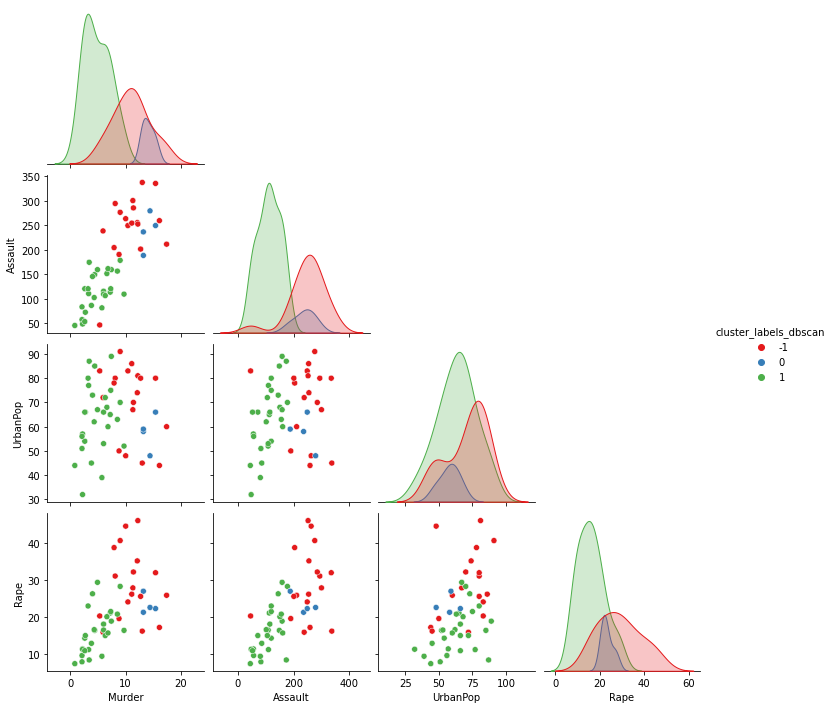

In [23]:
sns.pairplot(df,hue="cluster_labels_dbscan",palette="Set1",corner=True,vars=["Murder","Assault","UrbanPop","Rape"]);

In [24]:
df.groupby("cluster_labels_dbscan").mean()

,Murder,Assault,UrbanPop,Rape,cluster_labels_agglo,cluster_labels_kmeans
cluster_labels_dbscan,,,,,,
-1,11.005556,247.166667,70.666667,28.766667,0.833333,0.833333
0,14.050000,238.000000,57.750000,23.200000,1.000000,1.000000
1,4.825000,112.035714,63.357143,16.107143,0.000000,0.035714


### From the above profile we can say that the cities belonging to cluster 1 is more safer to people as the murder,assault and rape rates are lesser in these cities and cluster belonging to -1 are outliers .